Name: Tien-Ching Hsieh  
Github Username: hsieh2000  
USC ID: 2642366337  

In [292]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import _tree, DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression , RidgeCV , LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline 
from xgboost import XGBRegressor



## 1a. 

In [54]:
df = pd.read_csv('../data/diagnosis.data',
encoding='utf-16', 
header=None, 
sep='\t', 
names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Inflammation','Nephritis'], 
decimal=",")

## 1b.

In [55]:
df.replace({'no': 0, 'yes': 1}, inplace=True)

/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31017/3083669179.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'no': 0, 'yes': 1}, inplace=True)


In [56]:
df

,Temperature,Nausea,Lumbar,Urine,Micturition,Urethra,Inflammation,Nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


In [57]:
# (0, 0) => 1
# (0, 1) => 2
# (1, 0) => 3
# (1, 1) => 4
def convert(x, y):
    match (x, y):
        case (0, 0):
            return 1
        case (0, 1):
            return 2
        case (1, 0):
            return 3
        case (1, 1):
            return 4

df = df.assign(label=lambda df: df.apply(lambda row: convert(row["Inflammation"], row["Nephritis"]), axis=1))


In [58]:
df

,Temperature,Nausea,Lumbar,Urine,Micturition,Urethra,Inflammation,Nephritis,label
0,35.5,0,1,0,0,0,0,0,1
1,35.9,0,0,1,1,1,1,0,3
2,35.9,0,1,0,0,0,0,0,1
3,36.0,0,0,1,1,1,1,0,3
4,36.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1,2
116,41.5,0,0,0,0,0,0,0,1
117,41.5,1,1,0,1,0,0,1,2
118,41.5,0,1,1,0,1,0,1,2


In [65]:
X = df.iloc[:, :-3]
y = df.iloc[:, -3:-1]

In [69]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X, y)
pred = clf.predict(X)

[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.8, '  False'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

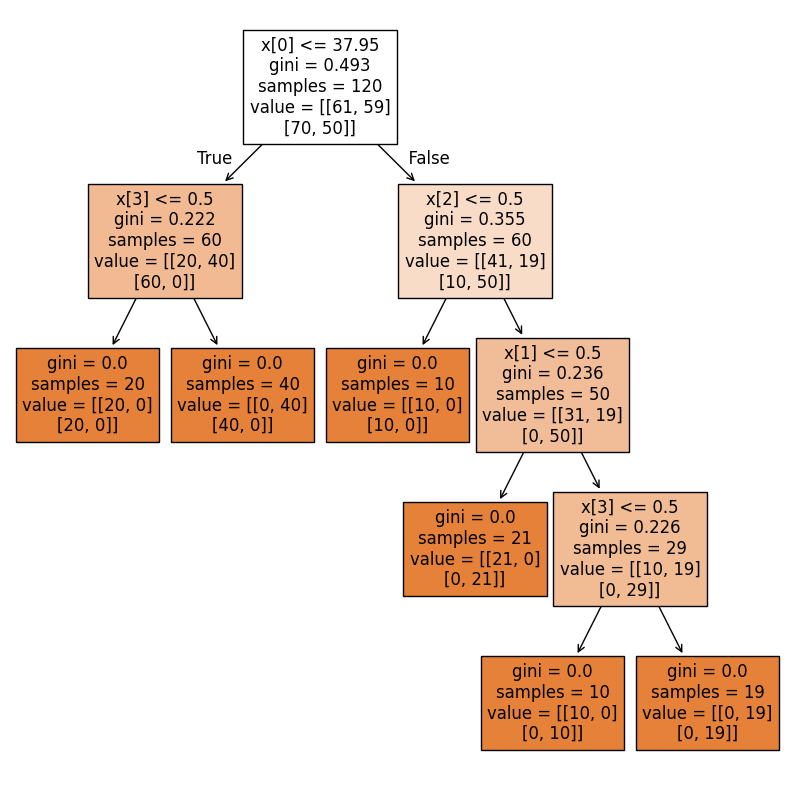

In [73]:
plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled = True)

## 1c.

In [ ]:

tree_ = clf.tree_
feature_name = [
    X.columns[i] if i != _tree.TREE_UNDEFINED else "undefined!"
    for i in tree_.feature
]

print("def tree({}):".format(", ".join(X.columns)))

def recurse(node, depth):
    indent = "  " * depth
    if tree_.feature[node] != _tree.TREE_UNDEFINED:
        name = feature_name[node]
        threshold = tree_.threshold[node]
        print("{}if {} <= {}:".format(indent, name, threshold))
        recurse(tree_.children_left[node], depth + 1)
        print("{}else:  # if {} > {}".format(indent, name, threshold))
        recurse(tree_.children_right[node], depth + 1)
    else:
        print("{}return [{}\n\t{}{}]".format(indent, tree_.value[node][0], indent, tree_.value[node][1]))

recurse(0, 1)

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra):
  if Temperature <= 37.95000076293945:
    if Urine <= 0.5:
      return [[1. 0.]
	      [1. 0.]]
    else:  # if Urine > 0.5
      return [[0. 1.]
	      [1. 0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[1. 0.]
	      [1. 0.]]
    else:  # if Lumbar > 0.5
      if Nausea <= 0.5:
        return [[1. 0.]
	        [0. 1.]]
      else:  # if Nausea > 0.5
        if Urine <= 0.5:
          return [[1. 0.]
	          [0. 1.]]
        else:  # if Urine > 0.5
          return [[0. 1.]
	          [0. 1.]]


## 1d.

In [75]:
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

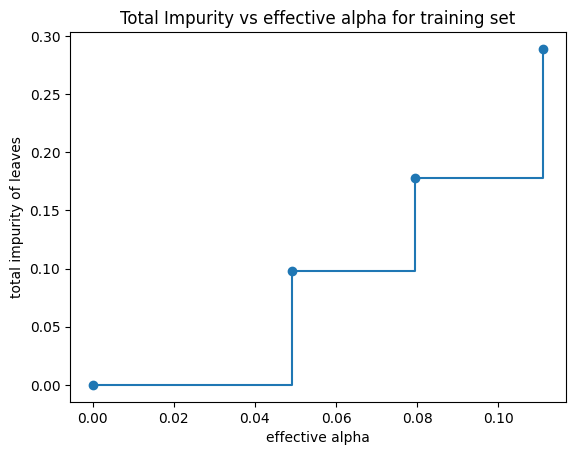

In [76]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

best ccp alpha:  0.0


[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.8, '  False'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

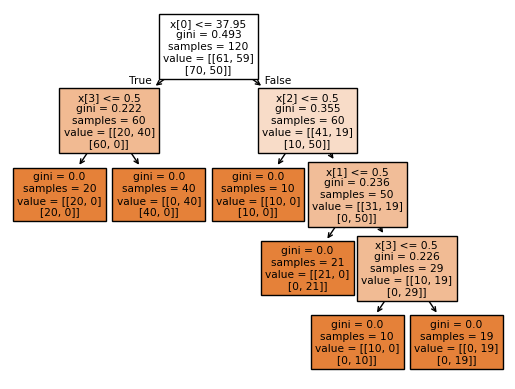

In [ ]:
clf = DecisionTreeClassifier(random_state = 42)
clf_cv = GridSearchCV(clf, cv = 5, param_grid={'ccp_alpha': ccp_alphas}, scoring='accuracy')
clf_cv.fit(X, y)

print("best ccp alpha: ", clf_cv.best_params_['ccp_alpha'])

min_clf = DecisionTreeClassifier(random_state = 42, ccp_alpha = clf_cv.best_params_['ccp_alpha'])
_ = min_clf.fit(X, y)
tree.plot_tree(min_clf, filled = True)

## 2a.

In [162]:
df = pd.read_csv('../data/communities.data',
header=None, 
na_values="?",
names=['state','county','community','communityname','fold','population',
'householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp',
'agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban',
'medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap',
'AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade',
'PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ',
'PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv',
'TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par',
'PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent',
'PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8',
'PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup',
'PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous',
'PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart',
'OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc',
'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn',
'PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop',
'LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic',
'PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian',
'PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens',
'PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy',
'LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop'])

In [163]:
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [164]:
df_train = df.iloc[:1495, 5:]
df_test = df.iloc[1495:, 5:]

## 2b.

In [173]:
df["ViolentCrimesPerPop"].isna().any()

np.False_

In [174]:
def data_imputation(_df, strategy='mean'):
    imputer = SimpleImputer(missing_values = np.nan, strategy=strategy)
    arr = imputer.fit_transform(_df)
    df = pd.DataFrame(arr, columns = _df.columns)
    return df


In [175]:
df_train_predictive = data_imputation(df_train, strategy="mean")
df_test_predictive = data_imputation(df_test, strategy="mean")


## 2c.

In [182]:
pd.concat([df_train_predictive, df_test_predictive]).corr()


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
population,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.713652,0.231897,0.270356,0.609025,0.591863,-0.060176,0.075756,0.466352,-0.035108,0.367157
householdsize,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,-0.015078,-0.004072,-0.051506,-0.032958,-0.009528,-0.011031,-0.002349,-0.094368,-0.052340,-0.034923
racepctblack,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,0.149758,0.095053,0.147023,0.121997,0.082672,-0.079922,0.010885,0.260793,0.022149,0.631264
racePctWhite,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.131389,-0.337458,-0.215636,-0.109236,-0.114599,0.050180,-0.033414,-0.276234,-0.005907,-0.684770
racePctAsian,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,-0.001084,0.389944,0.296921,-0.018025,0.067119,0.030704,0.064770,0.101888,-0.011324,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LemasPctPolicOnPatr,-0.060176,-0.011031,-0.079922,0.050180,0.030704,0.024973,-0.003476,0.009213,0.012742,0.019504,...,-0.071618,0.053388,0.026682,-0.107241,-0.058583,1.000000,0.035644,0.020296,-0.254718,-0.031598
LemasGangUnitDeploy,0.075756,-0.002349,0.010885,-0.033414,0.064770,0.026412,0.009440,0.003542,-0.001200,-0.036443,...,0.106469,-0.076351,-0.080706,0.079727,0.034917,0.035644,1.000000,-0.015673,-0.032356,0.057304
LemasPctOfficDrugUn,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.299632,0.228084,0.206644,-0.052428,-0.062375,0.020296,-0.015673,1.000000,0.018603,0.348627
PolicBudgPerPop,-0.035108,-0.052340,0.022149,-0.005907,-0.011324,0.001647,-0.074535,-0.066743,-0.049417,0.070538,...,-0.110060,0.067016,0.077984,0.242517,0.245440,-0.254718,-0.032356,0.018603,1.000000,0.042793


<Axes: >

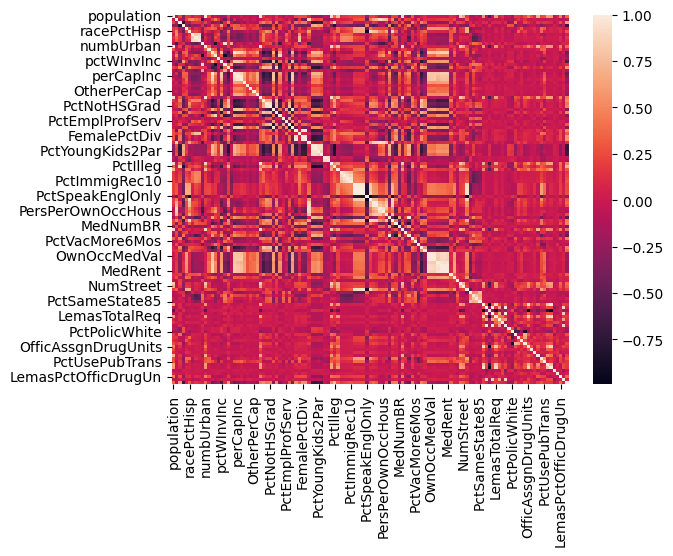

In [183]:
sns.heatmap(pd.concat([df_train_predictive, df_test_predictive]).corr())

## 2d.

In [185]:
df_combine = pd.concat([df_train_predictive, df_test_predictive])

In [196]:
cv = df_combine.describe().T['std']/df_combine.describe().T['mean']



## 2e.

In [214]:
cv.sort_values(ascending=False)[:math.ceil(np.sqrt(128))]
cv_col_name = cv.sort_values(ascending=False)[:math.ceil(np.sqrt(128))].index

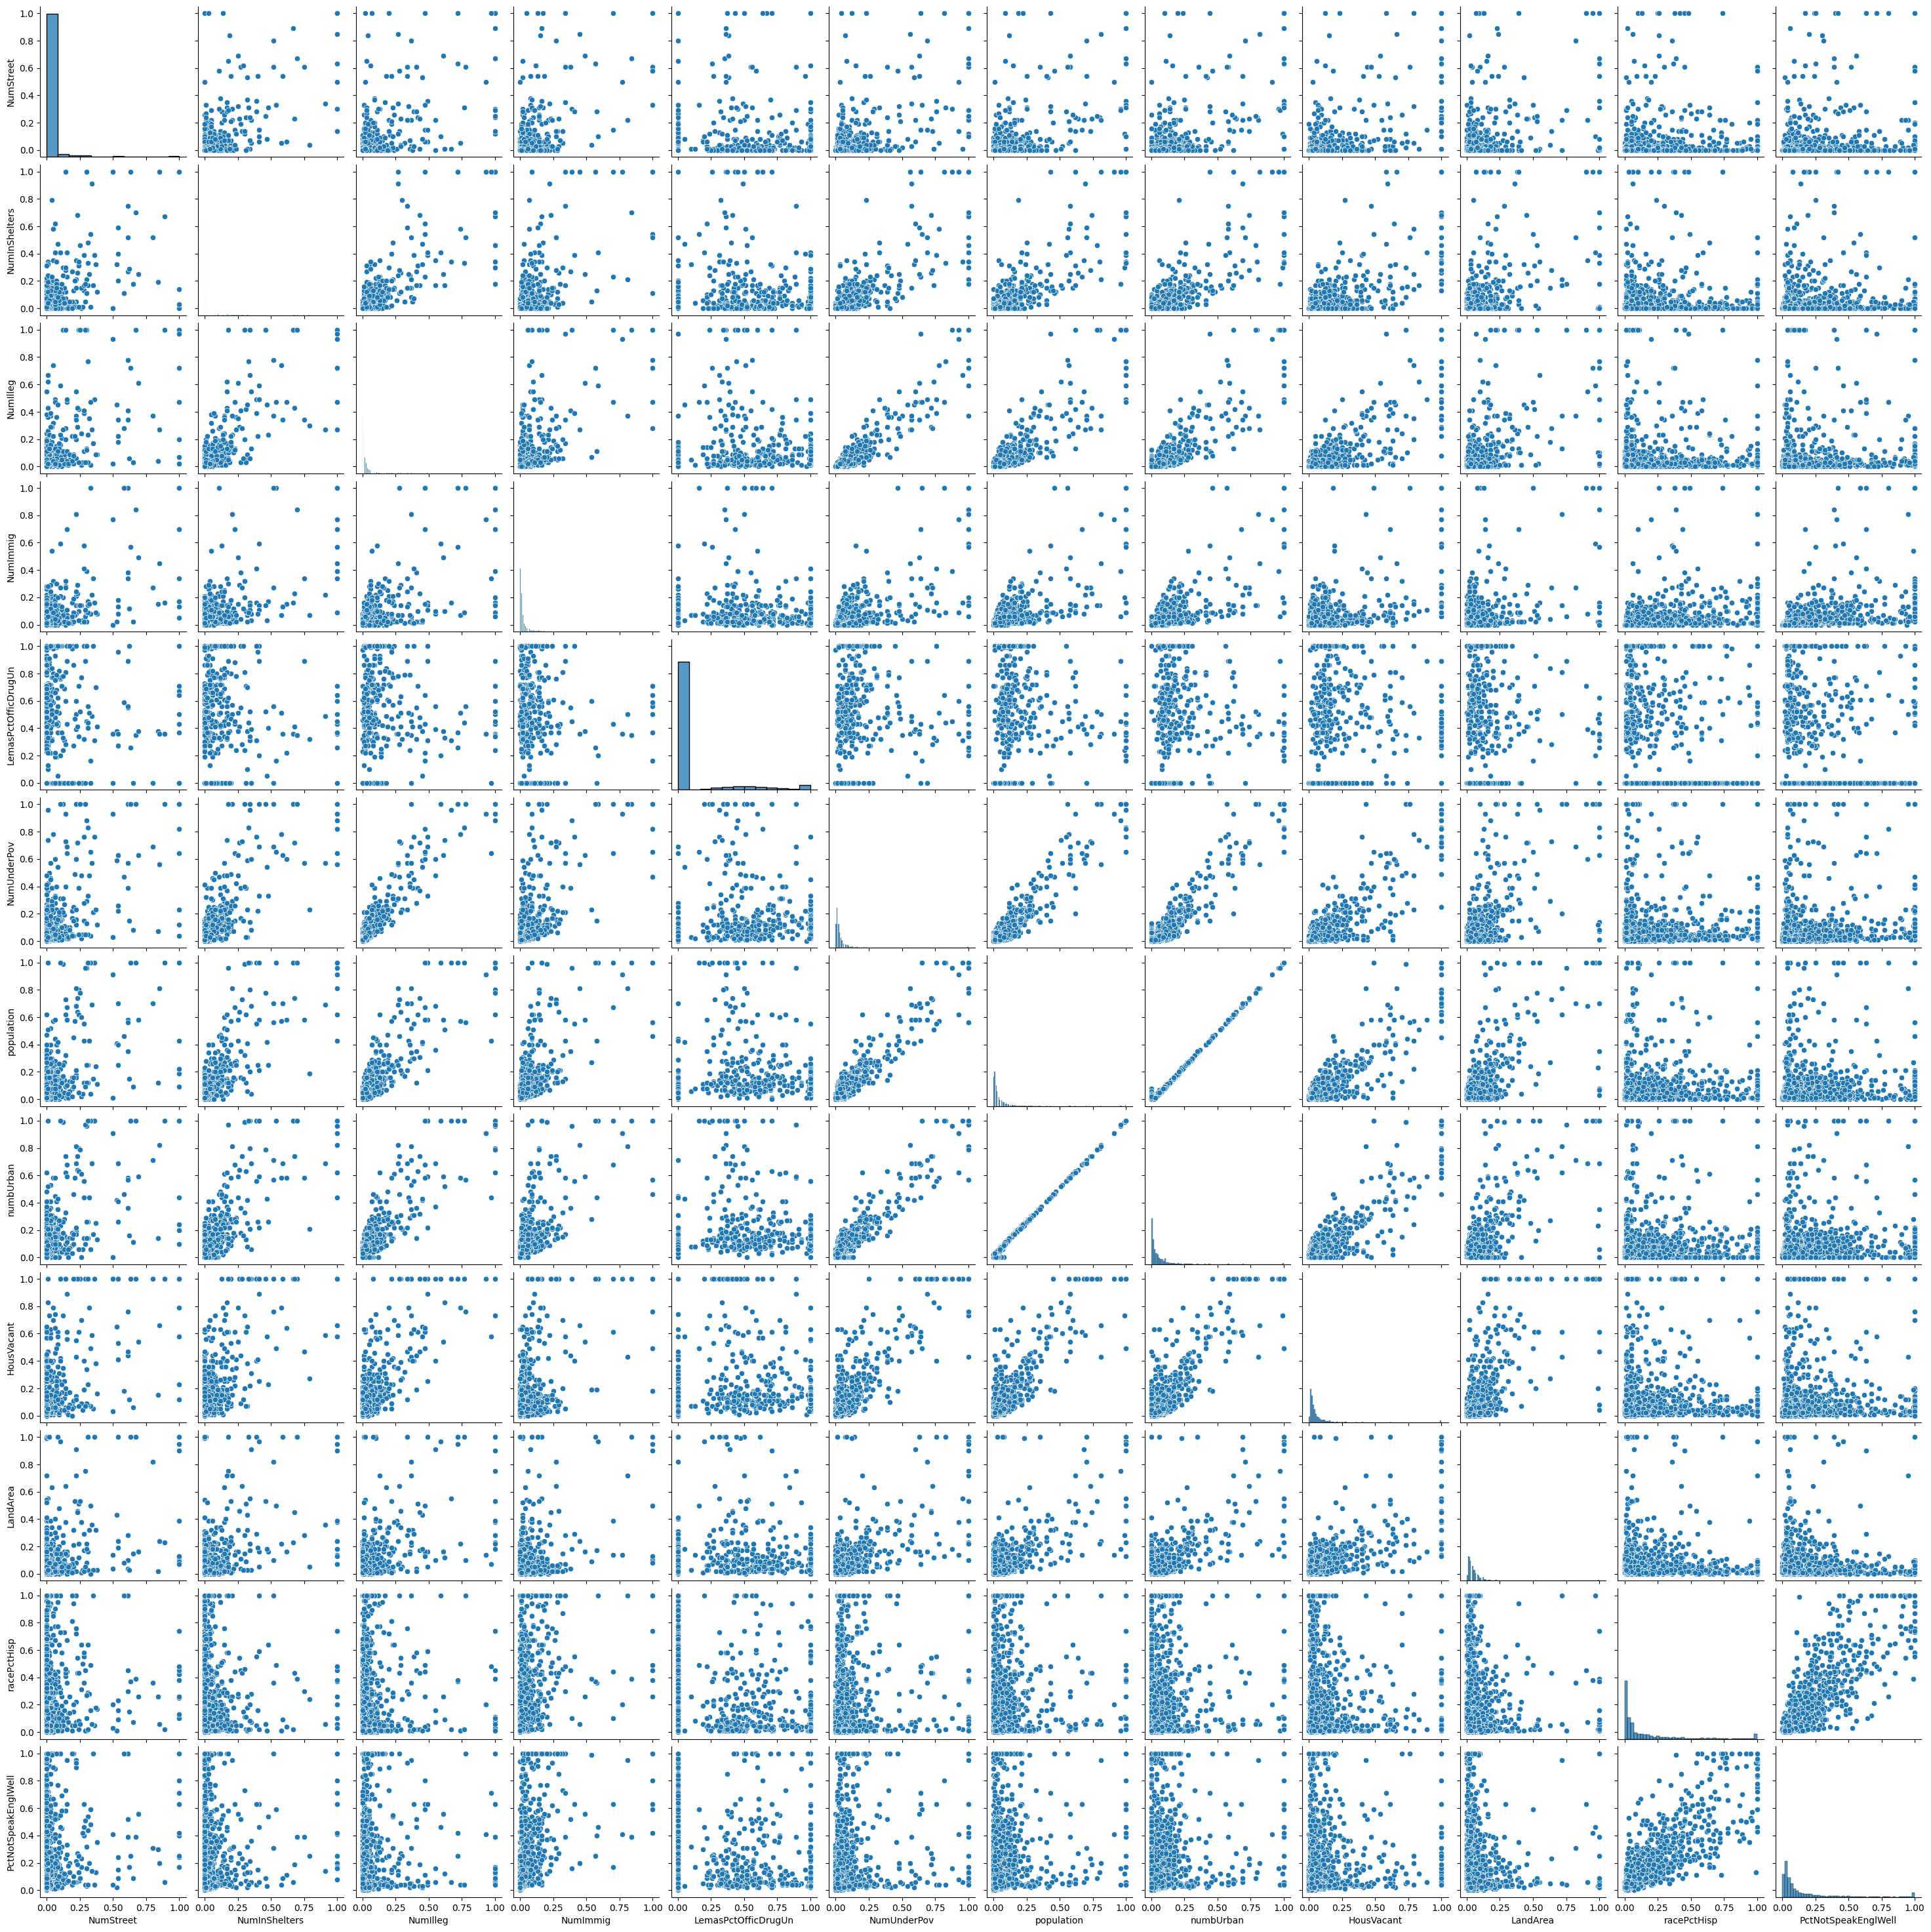

In [215]:
sns.pairplot(df_combine[cv_col_name])


No, I don't think I can draw conclusions about significance of those features just by the scatter plots?

<Axes: >

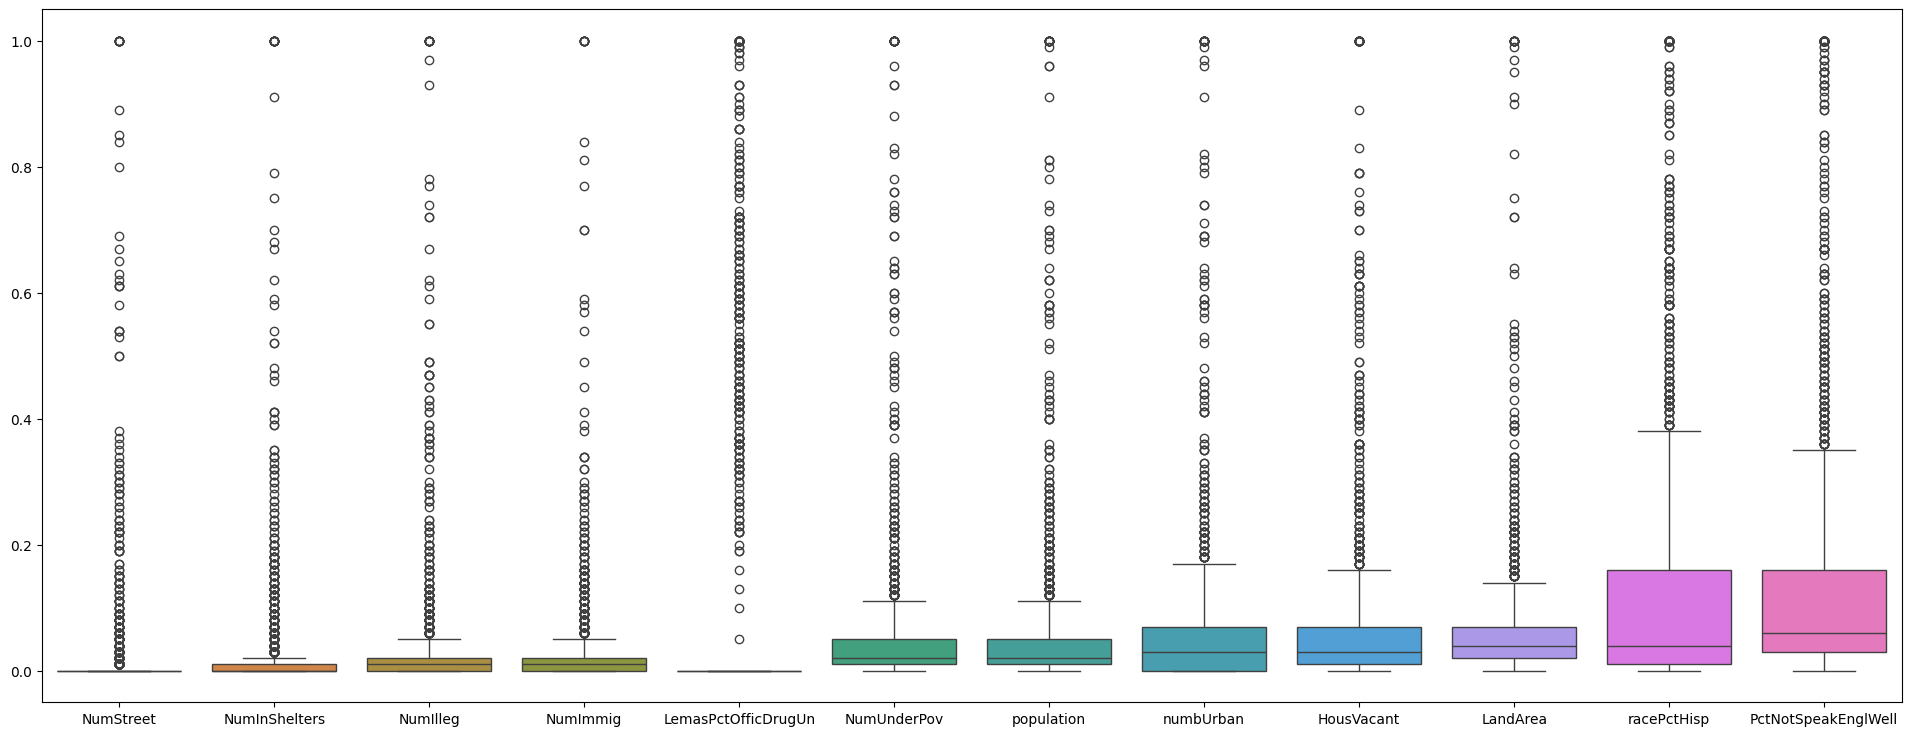

In [227]:
plt.figure(figsize=(24,9))
sns.boxplot(df_combine[cv_col_name])


## 2f.

In [235]:
X_train, y_train = df_train_predictive.iloc[:, :-1], df_train_predictive.iloc[:, -1]
X_test, y_test = df_test_predictive.iloc[:, :-1], df_test_predictive.iloc[:, -1]


In [246]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

y_pred = model.predict(X_test)
print(f"test mse: {mean_squared_error(y_test, y_pred)}")

test mse: 0.018112462026533487


## 2g.

In [247]:
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)
ridge_cv.fit(X_train, y_train)

y_pred = ridge_cv.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
print(f"test mse: {test_mse}")

test mse: 0.01772373712282812


/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


## 2h.

Raw dataset

In [255]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

print(f"best LassoCV lambda : {lasso_cv.alpha_}")
y_pred_raw = lasso_cv.predict(X_test)

mse_raw = mean_squared_error(y_test, y_pred_raw)
print(f"test mse with raw features: {mse_raw}")

selected_variables_raw = X.columns[lasso_cv.coef_ != 0]
print(f"variables selected by the Lasso model (raw features): {selected_variables_raw}")

best LassoCV lambda : 0.00011614723626829846
test mse with raw features: 0.017735383043771757
variables selected by the Lasso model (raw features): Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb

/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00975293022412771, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010113610153585029, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(


In [256]:
len(selected_variables_raw)

75

Normalized dataset

In [257]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print(f"best LassoCV lambda : {lasso_cv.alpha_}")
y_pred_scaled = lasso_cv.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f"test mse with scaled features: {mse_scaled}")

selected_variables_scaled = X.columns[lasso_cv.coef_ != 0]
print(f"variables selected by the Lasso model (scaled features): {selected_variables_scaled}")

best LassoCV lambda : 0.0007630833878262516
test mse with scaled features: 0.017807417896751894
variables selected by the Lasso model (scaled features): Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
       'NumImmig', 'PctImmigRec5', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant',
       'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'PctWOFullPlumb', 'Ren

/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009826702374006402, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010211306995138614, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009981166739443381, tolerance: 0.006746416078595318
  model = cd_fast.e

In [258]:
len(selected_variables_scaled)

73

## 2i.

In [283]:
results = {}

for i in range(X_train_scaled.shape[1]):

    pipeline = Pipeline([
        ('pca', PCA(n_components=i+1)),
        ('reg', LinearRegression())
    ])

    grid_search = GridSearchCV(pipeline, param_grid={}, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    results[i] = -grid_search.best_score_
    print(f"Best MSE of number of Principal Component = {i+1}: {results[i]}")

optimal_M = min(results, key=results.get)
print(f"Best number of Principal Component: {optimal_M}")
print(f"Best MSE: {results[optimal_M]}")

Best MSE of number of Principal Component = 1: 0.03790095364843407
Best MSE of number of Principal Component = 2: 0.0306292512692057
Best MSE of number of Principal Component = 3: 0.027566685641906043
Best MSE of number of Principal Component = 4: 0.024294378716070014
Best MSE of number of Principal Component = 5: 0.023092908837207236
Best MSE of number of Principal Component = 6: 0.02264848642498299
Best MSE of number of Principal Component = 7: 0.020143621879957038
Best MSE of number of Principal Component = 8: 0.020116094422540066
Best MSE of number of Principal Component = 9: 0.02003668251161681
Best MSE of number of Principal Component = 10: 0.019972233160679576
Best MSE of number of Principal Component = 11: 0.020010496333977036
Best MSE of number of Principal Component = 12: 0.020052274610456534
Best MSE of number of Principal Component = 13: 0.019930415926552505
Best MSE of number of Principal Component = 14: 0.01997223801590823
Best MSE of number of Principal Component = 15: 0

## 2j.

In [296]:
results = {}
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for alpha in alphas:
    xgboost_regressor = XGBRegressor(reg_alpha = alpha, random_state = 42)
    grid_search = GridSearchCV(xgboost_regressor, param_grid={}, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    results[i] = -grid_search.best_score_
    print(f"Best MSE of alpha = {alpha}: {results[i]}")


Best MSE of alpha = 0.001: 0.023894217207021878
Best MSE of alpha = 0.01: 0.02362111032235109
Best MSE of alpha = 0.1: 0.02373059737688775
Best MSE of alpha = 1: 0.021595521768291954
Best MSE of alpha = 10: 0.02243326833846057
Best MSE of alpha = 100: 0.05649951301594212
Best MSE of alpha = 1000: 0.05649951301594212
Best MSE of alpha = 10000: 0.05649951301594212


In [300]:
model = XGBRegressor(reg_alpha = 1, random_state = 42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

0.017833314078756258